In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysimul
from common import *
from math import *

In [2]:
simul = pysimul.PySimul()
simul['T'] = 1
simul['gamma'] = 10
simul['x0sigma'] = σ = 0.3
simul['reset_period'] = rT = 2

In [3]:
simul.start()
D = simul['T']/simul['gamma']

In [16]:
simul['n_trajectories']

178357

In [15]:
simul['pause'] = 1

In [17]:
path = "reset-fix/periodic-fast-T2-wide-m0"

Survival probability at fixed target position $L$ :

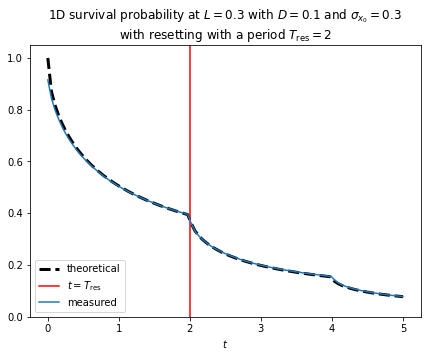

In [18]:
(acc, samples) = simul['survdist_time']
survdist_time = acc/samples*len(acc)
t = np.linspace(0, simul['survdist_max_t'], len(acc))+1e-10

plt.figure(figsize=(7,5))

L_sample = simul['survdist_time_pos']
survdist_th = fpt_periodic_survival(t, rT, L_sample/σ, fpt_periodical_c(rT,D,L_sample))
plt.plot(t, survdist_th, label=r"theoretical", color='black', linestyle='dashed', lw=3)
plt.axvline(x=rT, label=r"$t=T_\operatorname{res}$", color='red')

plt.plot(t, survdist_time, label=r"measured")

plt.xlabel("$t$")
plt.ylim((0,1.05))
plt.title(r"1D survival probability at $L={}$ with $D={}$ and $\sigma_{{x_0}}={}$".format(L_sample,D,σ)
          +"\n"+r"with resetting with a period $T_\operatorname{{res}}={}$".format(rT))
plt.legend(loc='lower left')
plt.savefig(path+"-survival-time.pdf", bbox_inches='tight')

Survival probability at fixed time $t$ :

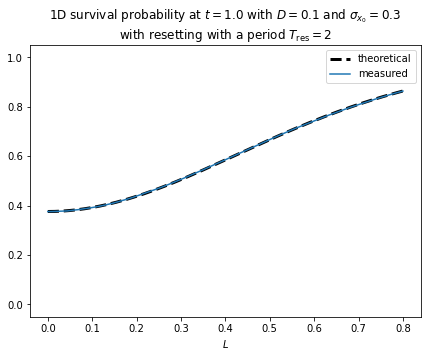

In [19]:
(acc, samples) = simul['survdist_pos']
survdist_pos = acc/samples
L = np.linspace(0, simul['survdist_max_x'], len(acc))+1e-10

plt.figure(figsize=(7,5))

t_sample = simul['survdist_pos_time']
survdist_th = fpt_periodic_survival(t_sample+1e-10, rT, L/σ, fpt_periodical_c(rT,D,L))
plt.plot(L, survdist_th, label=r"theoretical", color='black', linestyle='dashed', lw=3)

plt.plot(L, survdist_pos, label=r"measured")

plt.ylim((-0.05, 1.05))
plt.xlabel(r"$L$")
plt.title(r"1D survival probability at $t={}$ with $D={}$ and $\sigma_{{x_0}}={}$".format(t_sample,D,σ)
          +"\n"+r"with resetting with a period $T_\operatorname{{res}}={}$".format(rT))
plt.legend()
plt.savefig(path+"-survival-xtarg.pdf", bbox_inches='tight')

Difference between survival distribution for time and position at the common sampled point :

In [20]:
ix = np.searchsorted(L, L_sample)
it = np.searchsorted(t, t_sample)
print("{:.2f} %".format(100*abs(survdist_pos[ix]-survdist_time[it])/survdist_pos[ix]))

0.83 %


In [ ]:
simul.end()